# FINAL PROJECT

### Group Members
* Kavitha Kannanunny
* Natasha Christopher
* Joy Datta

In [1]:
# Importing header files
import numpy as np
import pandas as pd
import glob
import os


import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression

In [3]:
train=pd.read_csv(r'I:\CS675\train.csv')
train.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


Make a train directory with all the train files in one using glob

In [4]:
train_frags = glob.glob(r"I:\CS675\train\*")

In [5]:
train_frags[0:5]

['I:\\CS675\\train\\1000015382.csv',
 'I:\\CS675\\train\\1000554676.csv',
 'I:\\CS675\\train\\1000745424.csv',
 'I:\\CS675\\train\\1001461087.csv',
 'I:\\CS675\\train\\1001732002.csv']

In [6]:
test_frags = glob.glob(r"I:\CS675\test\*")

In [7]:
test_frags[0:5]

['I:\\CS675\\test\\1000213997.csv',
 'I:\\CS675\\test\\100023368.csv',
 'I:\\CS675\\test\\1000488999.csv',
 'I:\\CS675\\test\\1001028887.csv',
 'I:\\CS675\\test\\1001857862.csv']

## FEATURE ENGINEERING AND CREATING NEW FEATURES

### 1. Creating Features

In [8]:
def create_features(df,signal,seg_id,sensor_id):
    f = np.fft.fft(signal) #Fourier Transform 
    f_real = np.real(f) #only take real values
    df.loc[seg_id, f'{sensor_id}_sum']= signal.sum()
    df.loc[seg_id, f'{sensor_id}_mean']= signal.mean()
    df.loc[seg_id, f'{sensor_id}_std']= signal.std()
    df.loc[seg_id, f'{sensor_id}_max']= signal.max()
    df.loc[seg_id, f'{sensor_id}_min']= signal.min()
    return df

__Create a function to create new features for every train file__

__New features created are sum, standard deviation, mean, maximum, minimum of all the columns__

In [9]:
train = pd.read_csv(r"I:\CS675\train.csv")
train_df = pd.DataFrame()
train_df['segment_id'] = train.segment_id
train_df = train_df.set_index('segment_id')

j=0
for seg in train.segment_id:
    signals = pd.read_csv(f'I:/CS675/train/{seg}.csv')
    if j%500 == 0:
        print(j)
    for i in range(1, 11):
        sensor_id = f'sensor_{i}'
        train_df = create_features(train_df, signals[sensor_id].fillna(0), seg, sensor_id,)
    j+=1  

0
500
1000
1500
2000
2500
3000
3500
4000


In [10]:
train_df.columns

Index(['sensor_1_sum', 'sensor_1_mean', 'sensor_1_std', 'sensor_1_max',
       'sensor_1_min', 'sensor_2_sum', 'sensor_2_mean', 'sensor_2_std',
       'sensor_2_max', 'sensor_2_min', 'sensor_3_sum', 'sensor_3_mean',
       'sensor_3_std', 'sensor_3_max', 'sensor_3_min', 'sensor_4_sum',
       'sensor_4_mean', 'sensor_4_std', 'sensor_4_max', 'sensor_4_min',
       'sensor_5_sum', 'sensor_5_mean', 'sensor_5_std', 'sensor_5_max',
       'sensor_5_min', 'sensor_6_sum', 'sensor_6_mean', 'sensor_6_std',
       'sensor_6_max', 'sensor_6_min', 'sensor_7_sum', 'sensor_7_mean',
       'sensor_7_std', 'sensor_7_max', 'sensor_7_min', 'sensor_8_sum',
       'sensor_8_mean', 'sensor_8_std', 'sensor_8_max', 'sensor_8_min',
       'sensor_9_sum', 'sensor_9_mean', 'sensor_9_std', 'sensor_9_max',
       'sensor_9_min', 'sensor_10_sum', 'sensor_10_mean', 'sensor_10_std',
       'sensor_10_max', 'sensor_10_min'],
      dtype='object')

In [11]:
# combine new feature dataframe with given train dataframe
train_df = pd.merge(train_df.reset_index(), train, on=['segment_id'], how='left').set_index('segment_id')
train_df

,sensor_1_sum,sensor_1_mean,sensor_1_std,sensor_1_max,sensor_1_min,sensor_2_sum,sensor_2_mean,sensor_2_std,sensor_2_max,sensor_2_min,...,sensor_9_mean,sensor_9_std,sensor_9_max,sensor_9_min,sensor_10_sum,sensor_10_mean,sensor_10_std,sensor_10_max,sensor_10_min,time_to_eruption
segment_id,,,,,,,,,,,,,,,,,,,,,
1136037770,-96621.0,-1.610323,303.096099,1353.0,-1421.0,276834.0,4.613823,678.330828,5572.0,-5199.0,...,1.465042,372.386746,2021.0,-1747.0,155969.0,2.599440,596.865818,2187.0,-3527.0,12262005
1969647810,85569.0,1.426126,438.360560,2197.0,-2005.0,149069.0,2.484442,661.163255,5111.0,-4267.0,...,3.140131,404.904961,2189.0,-2615.0,1193751.0,19.895518,932.699662,5319.0,-4591.0,32739612
1895879680,150278.0,2.504592,241.575415,1148.0,-1115.0,326988.0,5.449709,831.469221,7587.0,-6147.0,...,-1.833336,261.360378,1778.0,-1542.0,58087.0,0.968101,500.544892,2522.0,-2798.0,14965999
2068207140,129950.0,2.165797,221.967825,1254.0,-1025.0,-22403.0,-0.373377,425.189594,2453.0,-2828.0,...,-3.363227,232.926808,1340.0,-1574.0,502895.0,8.381444,523.449843,3614.0,-2911.0,26469720
192955606,4429.0,0.073815,261.695935,1114.0,-1190.0,0.0,0.000000,0.000000,0.0,0.0,...,1.622906,325.089448,7725.0,-7252.0,-224432.0,-3.740471,562.748316,3274.0,-2611.0,31072429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873340274,54405.0,0.906735,613.427301,2916.0,-2610.0,-219499.0,-3.658256,940.746578,6661.0,-5989.0,...,-1.802253,574.012062,3085.0,-2399.0,-202647.0,-3.377394,1053.539787,5493.0,-5726.0,15695097
1297437712,476221.0,7.936884,649.089618,4498.0,-3654.0,0.0,0.000000,0.000000,0.0,0.0,...,5.439909,1046.360969,32767.0,-23269.0,656389.0,10.939634,1279.909391,14873.0,-13017.0,35659379
694853998,85261.0,1.420993,110.942596,557.0,-753.0,26814.0,0.446893,505.722491,4169.0,-4663.0,...,-1.149198,139.755330,897.0,-1002.0,-93024.0,-1.550374,251.560198,1549.0,-1708.0,31206935


### 2. Check for missing values

In [12]:
train_df.isnull().sum().head()

sensor_1_sum     0
sensor_1_mean    0
sensor_1_std     0
sensor_1_max     0
sensor_1_min     0
dtype: int64

### 3.Checking for outliers

In [13]:
upper_lim = train_df['time_to_eruption'].quantile(.95)
lower_lim = train_df['time_to_eruption'].quantile(.05)
train_df[(train_df['time_to_eruption'] < upper_lim) & (train_df['time_to_eruption'] > lower_lim)]
train_df.head()

,sensor_1_sum,sensor_1_mean,sensor_1_std,sensor_1_max,sensor_1_min,sensor_2_sum,sensor_2_mean,sensor_2_std,sensor_2_max,sensor_2_min,...,sensor_9_mean,sensor_9_std,sensor_9_max,sensor_9_min,sensor_10_sum,sensor_10_mean,sensor_10_std,sensor_10_max,sensor_10_min,time_to_eruption
segment_id,,,,,,,,,,,,,,,,,,,,,
1136037770,-96621.0,-1.610323,303.096099,1353.0,-1421.0,276834.0,4.613823,678.330828,5572.0,-5199.0,...,1.465042,372.386746,2021.0,-1747.0,155969.0,2.599440,596.865818,2187.0,-3527.0,12262005
1969647810,85569.0,1.426126,438.360560,2197.0,-2005.0,149069.0,2.484442,661.163255,5111.0,-4267.0,...,3.140131,404.904961,2189.0,-2615.0,1193751.0,19.895518,932.699662,5319.0,-4591.0,32739612
1895879680,150278.0,2.504592,241.575415,1148.0,-1115.0,326988.0,5.449709,831.469221,7587.0,-6147.0,...,-1.833336,261.360378,1778.0,-1542.0,58087.0,0.968101,500.544892,2522.0,-2798.0,14965999
2068207140,129950.0,2.165797,221.967825,1254.0,-1025.0,-22403.0,-0.373377,425.189594,2453.0,-2828.0,...,-3.363227,232.926808,1340.0,-1574.0,502895.0,8.381444,523.449843,3614.0,-2911.0,26469720
192955606,4429.0,0.073815,261.695935,1114.0,-1190.0,0.0,0.000000,0.000000,0.0,0.0,...,1.622906,325.089448,7725.0,-7252.0,-224432.0,-3.740471,562.748316,3274.0,-2611.0,31072429


### 4. Log Transform

In [14]:
train_df['target'] = (train_df['time_to_eruption']+1).transform(np.log)
train_df.head()

,sensor_1_sum,sensor_1_mean,sensor_1_std,sensor_1_max,sensor_1_min,sensor_2_sum,sensor_2_mean,sensor_2_std,sensor_2_max,sensor_2_min,...,sensor_9_std,sensor_9_max,sensor_9_min,sensor_10_sum,sensor_10_mean,sensor_10_std,sensor_10_max,sensor_10_min,time_to_eruption,target
segment_id,,,,,,,,,,,,,,,,,,,,,
1136037770,-96621.0,-1.610323,303.096099,1353.0,-1421.0,276834.0,4.613823,678.330828,5572.0,-5199.0,...,372.386746,2021.0,-1747.0,155969.0,2.599440,596.865818,2187.0,-3527.0,12262005,16.322016
1969647810,85569.0,1.426126,438.360560,2197.0,-2005.0,149069.0,2.484442,661.163255,5111.0,-4267.0,...,404.904961,2189.0,-2615.0,1193751.0,19.895518,932.699662,5319.0,-4591.0,32739612,17.304096
1895879680,150278.0,2.504592,241.575415,1148.0,-1115.0,326988.0,5.449709,831.469221,7587.0,-6147.0,...,261.360378,1778.0,-1542.0,58087.0,0.968101,500.544892,2522.0,-2798.0,14965999,16.521292
2068207140,129950.0,2.165797,221.967825,1254.0,-1025.0,-22403.0,-0.373377,425.189594,2453.0,-2828.0,...,232.926808,1340.0,-1574.0,502895.0,8.381444,523.449843,3614.0,-2911.0,26469720,17.091512
192955606,4429.0,0.073815,261.695935,1114.0,-1190.0,0.0,0.000000,0.000000,0.0,0.0,...,325.089448,7725.0,-7252.0,-224432.0,-3.740471,562.748316,3274.0,-2611.0,31072429,17.251831


### 5 .Normalizing

In [15]:
feature_scale=[feature for feature in train_df.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[feature_scale])
train_df =pd.DataFrame(scaler.transform(train_df[feature_scale]), columns=feature_scale)
train_df.head()

,sensor_1_sum,sensor_1_mean,sensor_1_std,sensor_1_max,sensor_1_min,sensor_2_sum,sensor_2_mean,sensor_2_std,sensor_2_max,sensor_2_min,...,sensor_9_std,sensor_9_max,sensor_9_min,sensor_10_sum,sensor_10_mean,sensor_10_std,sensor_10_max,sensor_10_min,time_to_eruption,target
0,0.633998,0.633998,0.014309,0.041292,0.956633,0.052884,0.052884,0.029807,0.170049,0.841334,...,0.019676,0.061678,0.946684,0.512612,0.512612,0.025458,0.066744,0.892361,0.249914,0.845418
1,0.637240,0.637240,0.020694,0.067049,0.938810,0.052434,0.052434,0.029053,0.155980,0.869778,...,0.021394,0.066805,0.920194,0.520879,0.520879,0.039782,0.162328,0.859890,0.667485,0.954930
2,0.638391,0.638391,0.011404,0.035035,0.965972,0.053061,0.053061,0.036537,0.231544,0.812403,...,0.013810,0.054262,0.952940,0.511832,0.511832,0.021349,0.076968,0.914609,0.305053,0.867639
3,0.638029,0.638029,0.010479,0.038270,0.968719,0.051829,0.051829,0.018684,0.074862,0.913694,...,0.012307,0.040895,0.951964,0.515376,0.515376,0.022326,0.110294,0.911161,0.539632,0.931225
4,0.635796,0.635796,0.012354,0.033998,0.963683,0.051908,0.051908,0.000000,0.000000,1.000000,...,0.017177,0.235755,0.778680,0.509582,0.509582,0.024003,0.099918,0.920316,0.633489,0.949102


In [16]:
#Dropping time to eruption as column target is the new target value.
train_df=train_df.drop(['time_to_eruption'], axis=1)
train_df.head()


,sensor_1_sum,sensor_1_mean,sensor_1_std,sensor_1_max,sensor_1_min,sensor_2_sum,sensor_2_mean,sensor_2_std,sensor_2_max,sensor_2_min,...,sensor_9_mean,sensor_9_std,sensor_9_max,sensor_9_min,sensor_10_sum,sensor_10_mean,sensor_10_std,sensor_10_max,sensor_10_min,target
0,0.633998,0.633998,0.014309,0.041292,0.956633,0.052884,0.052884,0.029807,0.170049,0.841334,...,0.359502,0.019676,0.061678,0.946684,0.512612,0.512612,0.025458,0.066744,0.892361,0.845418
1,0.637240,0.637240,0.020694,0.067049,0.938810,0.052434,0.052434,0.029053,0.155980,0.869778,...,0.360931,0.021394,0.066805,0.920194,0.520879,0.520879,0.039782,0.162328,0.859890,0.954930
2,0.638391,0.638391,0.011404,0.035035,0.965972,0.053061,0.053061,0.036537,0.231544,0.812403,...,0.356688,0.013810,0.054262,0.952940,0.511832,0.511832,0.021349,0.076968,0.914609,0.867639
3,0.638029,0.638029,0.010479,0.038270,0.968719,0.051829,0.051829,0.018684,0.074862,0.913694,...,0.355383,0.012307,0.040895,0.951964,0.515376,0.515376,0.022326,0.110294,0.911161,0.931225
4,0.635796,0.635796,0.012354,0.033998,0.963683,0.051908,0.051908,0.000000,0.000000,1.000000,...,0.359637,0.017177,0.235755,0.778680,0.509582,0.509582,0.024003,0.099918,0.920316,0.949102


In [37]:
features=train_df

In [38]:
features.columns

Index(['sensor_1_sum', 'sensor_1_std', 'sensor_1_max', 'sensor_2_sum',
       'sensor_2_std', 'sensor_2_max', 'sensor_3_sum', 'sensor_3_max',
       'sensor_4_sum', 'sensor_4_max', 'sensor_5_sum', 'sensor_5_std',
       'sensor_5_max', 'sensor_6_sum', 'sensor_6_std', 'sensor_6_max',
       'sensor_7_sum', 'sensor_7_std', 'sensor_7_max', 'sensor_8_sum',
       'sensor_8_std', 'sensor_8_max', 'sensor_9_sum', 'sensor_9_max',
       'sensor_10_sum', 'sensor_10_max', 'target'],
      dtype='object')

## Dimension Reduction 

### 1. Droping columns that are highly correlated 

In [39]:
#Using variance
#train_df.loc[:, train_df.var() > 0.5]

# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
features.drop(features[to_drop],axis=1,inplace=True)

In [41]:
#Setting target value
y=features['target']
features=features.drop('target',axis=1)



In [42]:
# Dropping duplicate column names that may have been created after join

newdf=features.loc[:,~features.columns.duplicated()]

### 2.Feature Importance using Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn import metrics

model = RandomForestRegressor(random_state=1, max_depth=10)
# train_df=pd.get_dummies(train_df)
model.fit(features,y)

RandomForestRegressor(max_depth=10, random_state=1)

In [48]:
dict(reversed(sorted(zip(model.feature_importances_, train_df.columns.values))))

{0.2352619421115084: 'sensor_2_std',
 0.17489499788775612: 'sensor_5_std',
 0.10683472867366305: 'sensor_6_std',
 0.06541205306300371: 'sensor_3_max',
 0.05119893019420825: 'sensor_8_std',
 0.047798506142045: 'sensor_1_std',
 0.03482089163494547: 'sensor_7_std',
 0.03184172293589694: 'sensor_2_max',
 0.028831141576739744: 'sensor_4_sum',
 0.02843132828497513: 'sensor_5_max',
 0.022456823677472287: 'sensor_9_max',
 0.021942651616154947: 'sensor_1_max',
 0.021536613143303948: 'sensor_6_max',
 0.016897457407440346: 'sensor_8_max',
 0.013916209334621012: 'sensor_5_sum',
 0.01368230717100887: 'sensor_10_max',
 0.01303024625748825: 'sensor_7_max',
 0.011745366664253201: 'sensor_8_sum',
 0.01013272531775427: 'sensor_4_max',
 0.009263776968861605: 'sensor_10_sum',
 0.009187625927018238: 'sensor_6_sum',
 0.0071441554282835745: 'sensor_1_sum',
 0.00660577701719704: 'sensor_7_sum',
 0.006565999501994688: 'sensor_2_sum',
 0.005747665374428873: 'sensor_9_sum',
 0.004818356687977018: 'sensor_3_sum'}

### 3. Feature Importance using PCA

In [49]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=0)
cols=list(x_train.columns)
pca = PCA(n_components = 25)
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test)

In [50]:
explained_variance = pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)[0:5]

array([0.66029891, 0.76948124, 0.83696789, 0.87746479, 0.8995431 ])

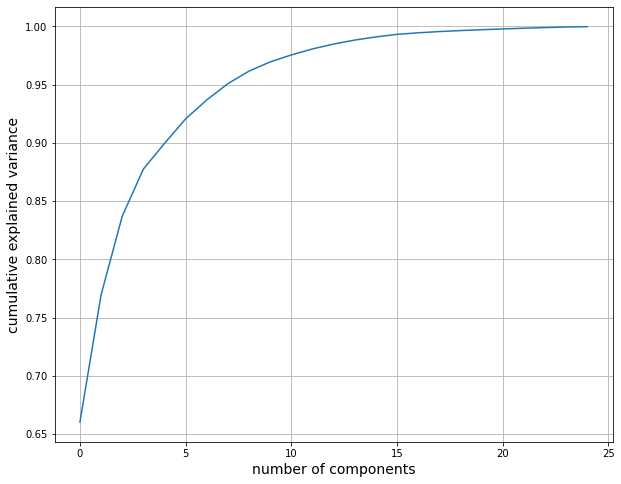

In [51]:
plt.figure(figsize = (10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)

plt.grid(True);

In [55]:
rf_base = RandomForestRegressor(n_estimators=400)
rf_base.fit(x_train, y_train)
# y_pred_rf_base = rf_base.predict(x_test)

# rf_base.score(x_test,y_test)

RandomForestRegressor(n_estimators=400)

In [56]:
imp_features = []
for i in range(25):
   
    imp_features_index = np.abs(pca.components_[i]).argmax()
    imp_features.append(cols[imp_features_index])
    
imp_features_dict = {'PC{}'.format(i+1): imp_features[i] for i in range(25)}
feature_col=pd.DataFrame(list(imp_features_dict.items()), columns=['PC', 'Name'])

In [57]:
feature_col.head()

,PC,Name
0,PC1,sensor_2_max
1,PC2,sensor_2_max
2,PC3,sensor_8_max
3,PC4,sensor_6_max
4,PC5,sensor_10_max


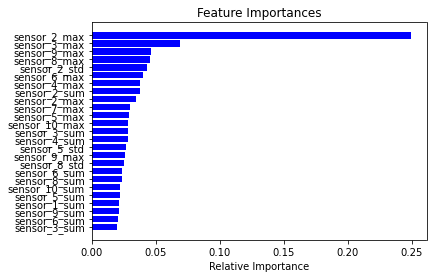

In [58]:
importances = rf_base.feature_importances_
indices = np.argsort(importances)
features_df = list(feature_col['Name'])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_df[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
#Columns after feature importance
newdf=newdf[features_df]
newdf.head()

,sensor_2_max,sensor_2_max,sensor_8_max,sensor_6_max,sensor_10_max,sensor_5_max,sensor_7_max,sensor_4_max,sensor_3_max,sensor_2_std,...,sensor_3_sum,sensor_2_sum,sensor_4_sum,sensor_10_sum,sensor_6_sum,sensor_5_std,sensor_6_sum,sensor_1_sum,sensor_9_sum,sensor_8_sum
0,0.170049,0.170049,0.077639,0.056835,0.066744,0.000000,0.090609,0.035005,0.043123,0.029807,...,0.513164,0.052884,0.413927,0.512612,0.435128,0.000000,0.435128,0.633998,0.359502,0.569690
1,0.155980,0.155980,0.045045,0.039922,0.162328,0.053835,0.074526,0.041963,0.052583,0.029053,...,0.507557,0.052434,0.410557,0.520879,0.435617,0.020098,0.435617,0.637240,0.360931,0.568307
2,0.231544,0.231544,0.036683,0.029848,0.076968,0.000000,0.048860,0.031402,0.035371,0.036537,...,0.508621,0.053061,0.411055,0.511832,0.432753,0.000000,0.432753,0.638391,0.356688,0.566532
3,0.074862,0.074862,0.047060,0.044181,0.110294,0.035585,0.048097,0.015002,0.041047,0.018684,...,0.507641,0.051829,0.410904,0.515376,0.440970,0.012287,0.440970,0.638029,0.355383,0.568843
4,0.000000,0.000000,0.043916,0.034076,0.099918,0.032350,0.031617,0.022302,0.035890,0.000000,...,0.511787,0.051908,0.412319,0.509582,0.442971,0.013957,0.442971,0.635796,0.359637,0.567930


### SUPERVISED LEARNING ALGORITHM

__1. Random Forest Regressor__

In [60]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(newdf, y, test_size=0.3, random_state=0)


In [61]:

rf_base = RandomForestRegressor(n_estimators=400)
rf_base.fit(x_train, y_train)
y_pred_rf_base = rf_base.predict(x_test)

rf_base.score(x_test,y_test)

0.5957417064160493

__2 : LINEAR REGRESSION__

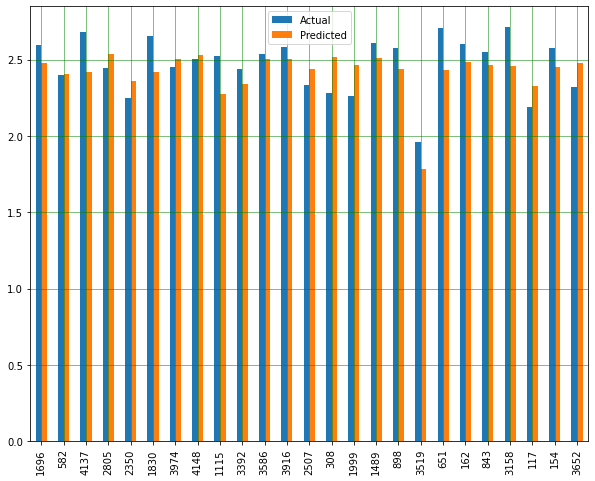

In [63]:
x_train, x_test, y_train, y_test = train_test_split(newdf, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)



df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = np.exp(df1.head(25))



df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [64]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

0.6607525601015567
[-0.0539657  -0.0539657   0.05326981  0.02491558 -0.04746717  0.11584897
  0.00153623  0.07743134 -0.07639724 -0.30165225  0.20950619 -0.06244694
 -0.06244694 -0.01611825  0.21588016 -0.01611825  0.49186469  0.20875625
  0.02794323 -0.0306995  -0.24260716 -0.0306995   0.30441452 -0.14026288
  0.04167586]


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("MSE test score:", mean_squared_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 0.06768028920722338
MSE test score: 0.00885417828305658
RMSE test score: 0.09409664331450182


### UNSUPERVISED LEARNING ALGORITHM

__1. KMEANS__


In [66]:
X=newdf.values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) 
kmeans.predict(X) 

array([0, 0, 0, ..., 0, 0, 0])

__2. DBSCAN__


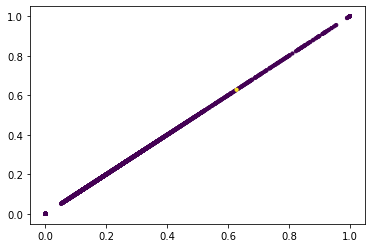

In [67]:
db = DBSCAN(eps=0.01, min_samples=6).fit(X)
agc = AgglomerativeClustering(linkage='single')
agc.fit(X)
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

In [68]:
#SCORES
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.8008109509683773
3 0.39076555029340165
4 0.334001224507742
5 0.3326961529770715
6 0.24598237530602568


### ADVANCED MODELS - XGBOOST

In [69]:
newdf=newdf.loc[:,~newdf.columns.duplicated()]

In [70]:
X, y = newdf.iloc[:,:-1],newdf.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [71]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [72]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.027186


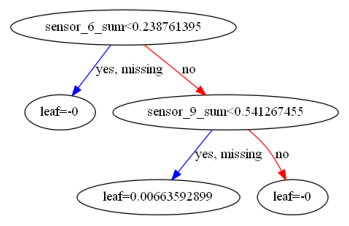

In [74]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

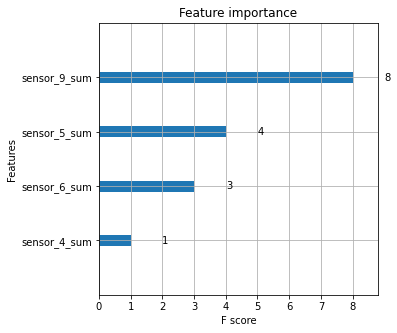

In [75]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### MODEL EVALUATION

##### Regression Metrics that can be used are:
    * Mean Absolute Error (MAE)
    * Mean squared Error
    * Root Mean Squared Error (RMSE)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("MSE test score:", mean_squared_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 0.31044086928010783
MSE test score: 0.09923101869068225
RMSE test score: 0.3150095533324065
